In [1]:
from cvm.utils import UnitConvert as uc
from matplotlib import pyplot as plt

from pprint import pprint

from cvm.A1 import Tetrahedron, TetraOctahedron
from cvm.sample import Sample
from cvm.vibration import ClusterVibration

from cvm.utils import get_inp, parse_formula, mixed_atomic_weight, parse_input_set, UnitConvert
import numpy as np
import pandas as pd

In [94]:
inp = parse_input_set('PdRu')

In [95]:
inp['series'][0]['energies']

,host,Rh4,Rh3Pd1,Rh2Pd2,Rh1Pd3,Pd4
lattice,,,,,,
6.8,-137329.934669,56054.227546,42040.848683,28027.363846,14013.751781,-0.000284
7.0,-137330.422297,56054.713814,42041.203724,28027.593918,14013.863402,-0.000284
7.1,-137330.577674,56055.000744,42041.414980,28027.732084,14013.931132,-0.000291
7.2,-137330.685568,56055.313457,42041.645950,28027.883706,14014.005745,-0.000325
7.3,-137330.752644,56055.648960,42041.894322,28028.047124,14014.086359,-0.000365
7.4,-137330.785161,56056.004368,42042.157810,28028.220773,14014.172184,-0.000447
7.5,-137330.788835,56056.376716,42042.434182,28028.403103,14014.262390,-0.000558
7.6,-137330.768290,56056.763131,42042.721154,28028.592563,14014.356174,-0.000748
7.7,-137330.727745,56057.160812,42043.016629,28028.787668,14014.452747,-0.001052


In [96]:
tmp = Tetrahedron(**inp)
tmp

Tetrahedron(None,
            {'$T_\\mathrm{FD}=800$K': Sample(None,
                    {'Rh4': c1: 7.791099,  c2: 7.790715,  lambda: 1.380909
                     r0: 2.817926,  x0: 0.020419
                     Gruneisen constant: 1.945649
                     Equilibrium lattice constant: 7.210733 a.u.
                     Bulk Modulus: 3024.103591 Kbar
                     Debye temperature: 378.882086 K,
                     'Rh3Pd1': c1: 6.641951,  c2: 6.641496,  lambda: 1.413998
                     r0: 2.837624,  x0: 0.018090
                     Gruneisen constant: 2.006197
                     Equilibrium lattice constant: 7.261133 a.u.
                     Bulk Modulus: 2684.279497 Kbar
                     Debye temperature: 356.685988 K,
                     'Rh2Pd2': c1: 5.553872,  c2: 5.553465,  lambda: 1.450460
                     r0: 2.859957,  x0: 0.015792
                     Gruneisen constant: 2.074127
                     Equilibrium lattice constant: 7.318281 a

In [22]:
tmp['$T_\mathrm{FD}=800$K']['Al5Mg1'](300)

-38506.83183151702

In [23]:
def patch(r0):
    _1st = -0.081 + (-0.00365 * (r0 - 7.85) / 0.1)
    _2nd = 0
    _3body = 0
    _4body = 0
    
    return ((_1st, _2nd), _3body, _4body)

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def percent(x, pos=0):
    return u'{:3.1f}'.format(100 * x)


def process(meta, *results, experiment=None):    

    def percent(x, pos=0):
        return u'{:3.1f}'.format(100 * x)
    
    fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)  # 800 * 500
    plt.subplots_adjust(top=0.97, bottom=0.14, left=0.12, right=0.97)

    # draw experiment
    if experiment is not None:
        y_exp = experiment['temperature']
        x_exp = experiment['concentration']
        # ax.annotate('1200$K$', (0.005, 410), fontsize=13)
        ax.plot(
            x_exp, y_exp, 'x--', mew=3, mfc='w', ms=6, lw=1.5, label='Experiment')

    # draw results
    line_type = ['o-', 'o--', 'o:']
    for i, res in enumerate(results):
        # plt.xlim(xmin=0.5, xmax=12.5)
        # plt.axhline(y=0, color='k', ls='-', lw=1.0)
        # label[i] = 'int= ' + '{:07.4}'.format(Results[i]['1st_int'])
        ax.plot(
            res['c'],
            res['temp'],
            # 'o-',
            line_type[i],
            color='darkorange',
            ms=4,
            lw=1.5,
            label=res['label'])

    # set formater
    ax.xaxis.set_major_formatter(FuncFormatter(percent))
    ax.set_xlim(0, 0.122)

    # for preview
    ax.grid(axis='y')
    ax.tick_params(labelsize=14.5)
    ax.set_ylabel(r'Temperature, $T$/K', size=16)
    ax.set_xlabel(
        r'Concentration of ' + meta['impurity'].capitalize() +
        r', $c$/at$\%$',
        size=16)
#     ax.annotate(
#         r'(b)CVMTO10, with thermal vibration effect', (0.003, 1830), size=15)
#     ax.annotate(r'$T_\mathrm{FD}=1600$K', (0.004, 1630), size=17)
    ax.legend(loc='lower right', markerscale=1.2, fontsize=15)
    fig_name = "_".join(
        (meta['prefix'], meta['host'], meta['impurity'],
         meta['suffix'])).lstrip('_')
#     plt.savefig(fig_name, dpi=600)  # 300 dpi
    plt.show()



In [25]:
tmp['$T_\mathrm{FD}=800$K'].ie(400, UnitConvert.lc2ad(7.8))

{'1st': 0.036629575573897455,
 '2nd': -0.0006693342147627845,
 'triple': 0.00758621276327176,
 'tetra': 0.002378655983193312}

In [26]:
tmp['$T_\mathrm{FD}=800$K'].ie(400)

{'1st': -0.1057784335098404,
 '2nd': -0.09935662112548016,
 'triple': 0.025250672799302265,
 'tetra': -0.0070935005496721715}

In [38]:
temp = []
con = []

for l, T, c, c_, e_int in tmp():
    temp.append(T)
    con.append(c)
    print('1st: %.5f eV' % (e_int['1st']))
#     print('2nd: %.5f eV' % (e_int['2nd']))
    print('triple: %.5f eV' % (e_int['triple']))
    print('tetra: %.5f eV' % (e_int['tetra']))
    print('T=%6.3f' % T, 'Concentration=%6.4f%%' % (c * 100), 'Counts=%s' % c_, '\n')

1st: -0.10438 eV
triple: 0.02511 eV
tetra: -0.00695 eV
T=500.000 Concentration=0.0038% Counts=59 

1st: -0.10390 eV
triple: 0.02506 eV
tetra: -0.00689 eV
T=532.759 Concentration=0.0074% Counts=48 

1st: -0.10343 eV
triple: 0.02501 eV
tetra: -0.00684 eV
T=565.517 Concentration=0.0137% Counts=52 

1st: -0.10294 eV
triple: 0.02496 eV
tetra: -0.00679 eV
T=598.276 Concentration=0.0236% Counts=56 

1st: -0.10245 eV
triple: 0.02491 eV
tetra: -0.00673 eV
T=631.034 Concentration=0.0385% Counts=59 

1st: -0.10196 eV
triple: 0.02487 eV
tetra: -0.00668 eV
T=663.793 Concentration=0.0602% Counts=62 

1st: -0.10146 eV
triple: 0.02482 eV
tetra: -0.00662 eV
T=696.552 Concentration=0.0905% Counts=65 

1st: -0.10095 eV
triple: 0.02477 eV
tetra: -0.00656 eV
T=729.310 Concentration=0.1318% Counts=68 

1st: -0.10044 eV
triple: 0.02472 eV
tetra: -0.00650 eV
T=762.069 Concentration=0.1866% Counts=71 

1st: -0.09993 eV
triple: 0.02467 eV
tetra: -0.00644 eV
T=794.828 Concentration=0.2581% Counts=75 

1st: -0.09

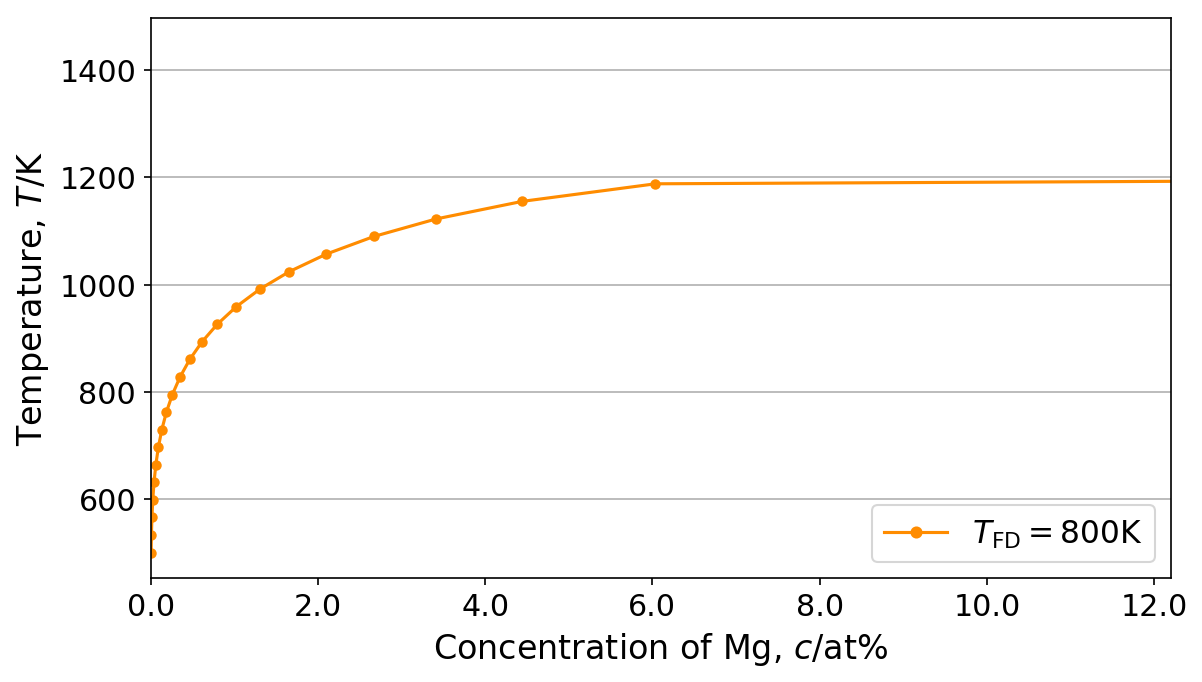

In [39]:
process(tmp.meta, dict(temp=temp, c=con, label='$T_\\mathrm{FD}=800$K'))

* T=900.0 Concentration=0.1322374574878373 Counts=214

# Convert old input card

1. meta and experiment

In [5]:
from ruamel.yaml import YAML
import sys

yaml = YAML()
yaml.indent(mapping=4, sequence=4, offset=2)
yaml.default_flow_style = None
yaml.width = 120

In [21]:
inp = get_inp('../ru_vibration_T.json')

In [22]:
meta = dict(host=inp['host'], impurity=inp['impurity'], prefix=inp['prefix'], description=inp['description'], structure=inp['structure'])
experiment = dict(temperature=inp['experiment'][0]['temp'], concentration=inp['experiment'][0]['c'])

tmp = {'meta': meta, 'experiment': experiment}

In [23]:
tmp

{'meta': {'host': 'Pd',
  'impurity': 'Ru',
  'prefix': '',
  'description': 'PdRu solubility limit calculation with tetrahedron approximation',
  'structure': 'A1'},
 'experiment': {'temperature': [1800, 1600, 1400, 1200, 1000],
  'concentration': [0.1615, 0.12, 0.078, 0.045, 0.029]}}

In [24]:
with open('input.yml', 'w') as f:
    yaml.dump(tmp, f)

2. enegires

In [25]:
def extractor(s, prefix):
    print(s['label'])
    print(s['transfer'])
    print(s['temp'])
    data = s['datas']
    lattice = data['lattice_c']
    host=data['host_en']
    
    n_ens = {}
    for i in range(11):
        s_i = str(i + 1)
        l = 'pair' + s_i
        n_ens[s_i + '_II'] = data[l][0]['energy']
        n_ens[s_i + '_IH'] = data[l][1]['energy']
        n_ens[s_i + '_HH'] = data[l][2]['energy']
    
    normalizer = dict(lattice=lattice, **n_ens)
    clusters = dict(
        lattice=lattice,
        host=host,
        Rh4=data['tetra'][0]['energy'],
        Rh3Pd1=data['tetra'][1]['energy'],
        Rh2Pd2=data['tetra'][2]['energy'],
        Rh1Pd3=data['tetra'][3]['energy'],
        Pd4=data['tetra'][4]['energy'],
    )
    
    n_name = prefix + '_normalizer.csv'
    c_name = prefix + '_clusters.csv'
    
    print(n_name)
    print(c_name)
    print()
    
    pd.DataFrame(normalizer).to_csv(n_name, index=False)
    pd.DataFrame(clusters).to_csv(c_name, index=False)
    

In [26]:
for i, s in enumerate(inp['series']):
    extractor(s, str(i))

$T_\mathrm{FD}=800$K
[[1, 11, 2]]
[400, 1290, 50]
0_normalizer.csv
0_clusters.csv

$T_\mathrm{FD}=1000$K
[[1, 11, 2]]
[400, 1550, 50]
1_normalizer.csv
1_clusters.csv

$T_\mathrm{FD}=1200$K
[[1, 11, 2]]
[400, 1700, 50]
2_normalizer.csv
2_clusters.csv

$T_\mathrm{FD}=1400$K
[[1, 11, 2]]
[500, 1700, 50]
3_normalizer.csv
3_clusters.csv

$T_\mathrm{FD}=1600$K
[[1, 11, 2]]
[500, 1870, 50]
4_normalizer.csv
4_clusters.csv



# other test

In [79]:
with open('test.yml', 'r') as f:
    tmp = yaml.load(f)

In [83]:
pprint(tmp['series'][1])

{'clusters': {'1st': ordereddict([('Pd2Ru2', 1), ('Pd3Ru1', -2), ('Pd4', 1)]),
              '2nd': ordereddict([('Pd4Ru2', 1), ('Pd5Ru1', -2), ('Pd6', 1)]),
              'tetra': {'Pd1Ru3': -4,
                        'Pd2Ru2': 6,
                        'Pd3Ru1': -4,
                        'Pd4': 1,
                        'Ru4': 1},
              'triple': {'Pd1Ru3': 1,
                         'Pd2Ru2': -3,
                         'Pd3Ru1': 3,
                         'Pd4': -1}},
 'condition': 1e-07,
 'energies': 'cluster.csv',
 'host': 'host',
 'is_ry_unit': True,
 'label': '$T_\\mathrm{FD}=800$K',
 'lattice': 'lattice',
 'mean': 'arithmetic',
 'skip': False,
 'temperature': [400, 1000, 20],
 'test': ordereddict([('aaaa', 3333), ('sd', 'sfe')]),
 'x_1': 0.01}


In [78]:
pprint(tmp)

{'default': {'URL': 'stooges.com',
             'stooges': {'curly': 'third_stooge',
                         'larry': 'first_stooge',
                         'moe': 'second_stooge'},
             'throw_pies?': True},
 'development': {'URL': 'stooges.local',
                 'stooges': ordereddict([('shemp', 'fourth_stooge')]),
                 'throw_pies?': True},
 'test': {'URL': 'test.stooges.qa',
          'stooges': {'curly': 'third_stooge',
                      'larry': 'first_stooge',
                      'moe': 'second_stooge'},
          'throw_pies?': True}}
